# Weather COLUMNS TEST

## 1. Importing the modules

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Custom utilities for working with weather data
import utils_weather as we

In [3]:
import importlib
def reload_we():
    importlib.reload(we)

## 2. Loading data and creating the dataset

In [4]:
df = we.pd.read_csv('input/weatherAUS.csv')
df.shape

(145460, 23)

In [5]:
df.info(memory_usage='deep', verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 23 entries, Date to RainTomorrow
dtypes: float64(16), object(7)
memory usage: 76.4 MB


In [6]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [7]:
df['Date'].values

array(['2008-12-01', '2008-12-02', '2008-12-03', ..., '2017-06-23',
       '2017-06-24', '2017-06-25'], dtype=object)

In [9]:
df['Date'] = we.pd.to_datetime(df['Date'])

In [10]:
df['Date'].values

array(['2008-12-01T00:00:00.000000000', '2008-12-02T00:00:00.000000000',
       '2008-12-03T00:00:00.000000000', ...,
       '2017-06-23T00:00:00.000000000', '2017-06-24T00:00:00.000000000',
       '2017-06-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [11]:
df.shape

(145460, 23)

## 3. Testing columns of the dataset

In [12]:
df.axes

[RangeIndex(start=0, stop=145460, step=1),
 Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
        'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
        'Temp3pm', 'RainToday', 'RainTomorrow'],
       dtype='object')]

In [13]:
# Testing a column group N1
list_1 = ['MinTemp', 'MaxTemp', 'Rainfall',
          'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
          'Temp9am', 'Temp3pm']

we.isna_stats(df, list_1)

MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
WindGustSpeed     7.06 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Temp9am           1.21 %
Temp3pm           2.48 %
dtype: object

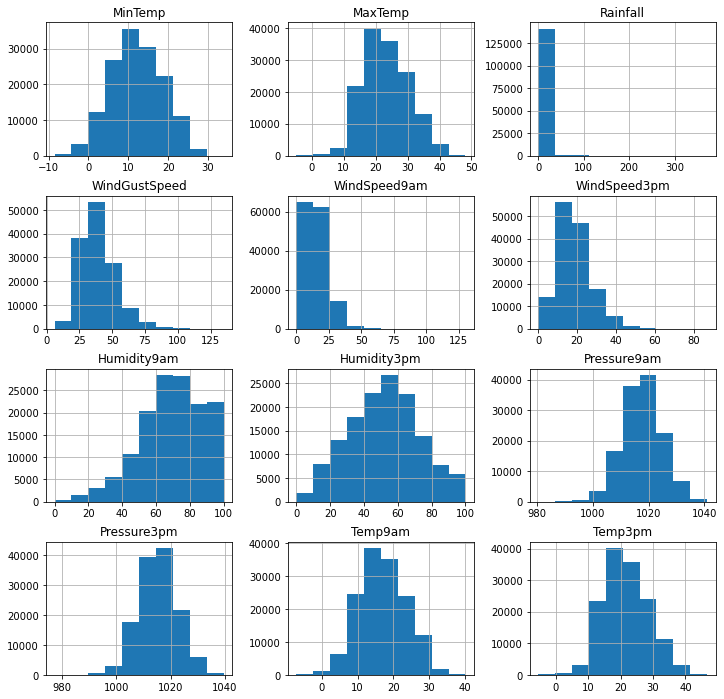

In [14]:
df[list_1].hist(figsize=(12, 12))
plt.show()

In [15]:
%%time
result_1 = {}
for x_column in list_1:
    result_1[x_column] = we.test_fillna_column(df, x_column)

result_1.keys()

CPU times: user 11.3 s, sys: 115 ms, total: 11.4 s
Wall time: 11.6 s


dict_keys(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'])

In [16]:
check_result_1 = result_1['MinTemp']
check_result_1.head(2)

,Date,Location,Origin,G Ffill,G Median,G Mean,Median,Mean,G Mode,Mode
0,2008-12-01,Albury,13.4,13.4,13.4,13.4,13.4,13.4,13.4,13.4
1,2008-12-02,Albury,7.4,7.4,7.4,7.4,7.4,7.4,7.4,7.4



	G Ffill



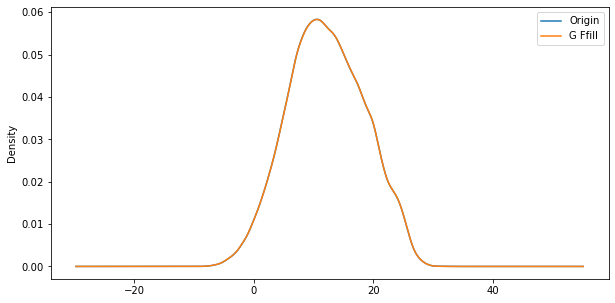


	G Median



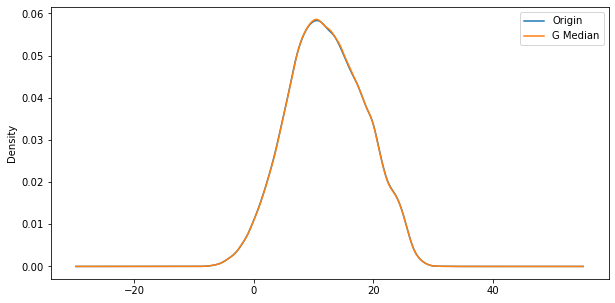


	G Mean



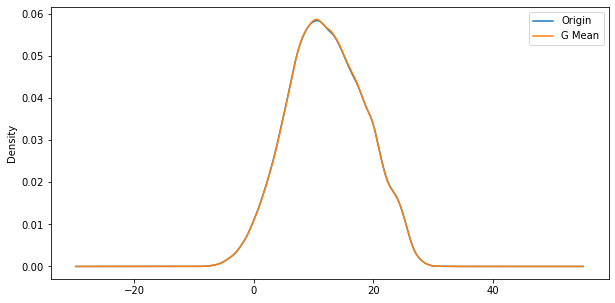


	Median



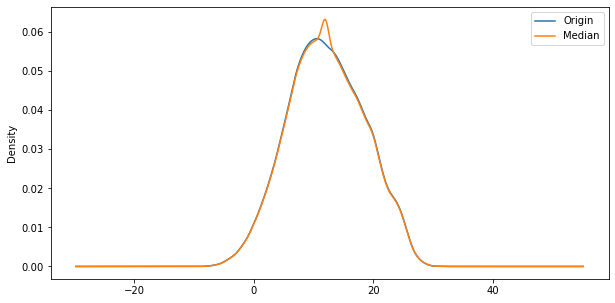


	Mean



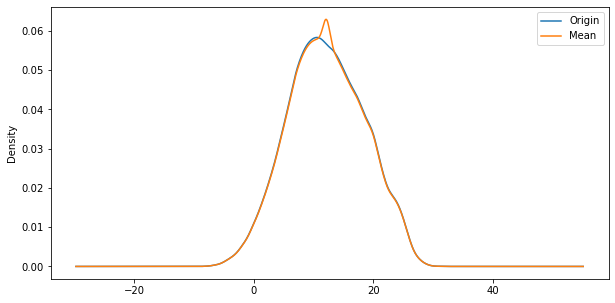


	G Mode



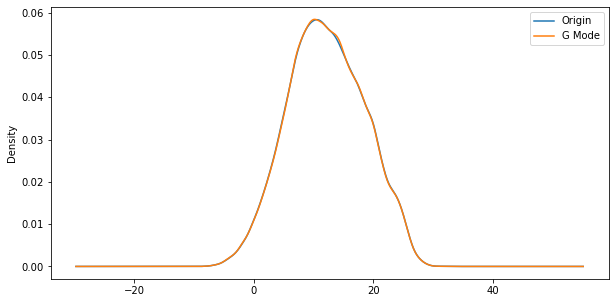


	Mode



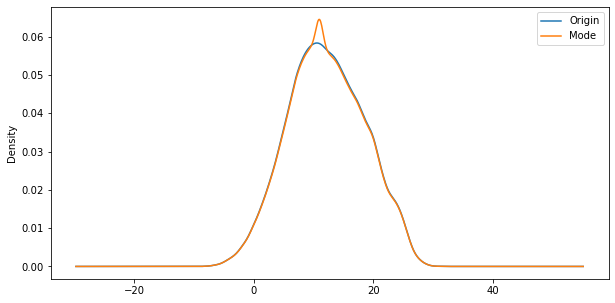

CPU times: user 2min 42s, sys: 726 ms, total: 2min 42s
Wall time: 2min 42s


In [17]:
%%time
list_columns = check_result_1.columns[2:].tolist()
col_orig = list_columns.pop(0)

for x_column in list_columns:
    print(f"\n\t{x_column}\n")
    check_result_1[[col_orig, x_column]].plot.kde(figsize=(10, 5))
    plt.show()

In [18]:
we.notna_column(df, 'MinTemp', period='all')[:20]

Date           1   2   3   4   5   6   7   8   9   10  11  12
Location Date                                                
Adelaide 2008   0   0   0   0   0   0  31  31  30  30  30  31
         2009  31  28  31  30  31  30  31  31  30  31  30  31
         2010  31  28  31  30  31  30  31  31  30  31  30  31
         2011  31  28  31   0  31  30  31  31  30  31  30  31
         2012  31  29  31  30  31  30  31  31  30  31  30   0
         2013  31   0  31  30  31  30  31  31  30  31  30  31
         2014  31  28  31  30  31  30  31  31  30  31  30  31
         2015  31  28  31  30  31  30  31  31  30  31  29  31
         2016  31  29  31  30  31  30  31  31  30  31  30  31
         2017  31  28  31  30  31  25   0   0   0   0   0   0
Albany   2008   0   0   0   0   0   0   0   0   0   0   0  30
         2009  30  25  31  30  31  30  31  31  30  31  30  31
         2010  31  28  31  30  31  30  31  31  30  31  30  31
         2011  31  28  31   0  31  30  31  31  30  31  30  31
         2012  30  29  31  29  31  28  31  31  30  31  30   0
         2013  30   0  30  30  31  30  31  31  30  31  30  31
         2014  30  27  31  28  31  30  30  31  30  31  30  29
         2015  30  28  31  29  30  30  30  31  30  31  30  29
         2016  30  29  30  30  31  30  30  30  30  30  29  28
         2017  27  26  26  26  30  11   0   0   0   0   0   0

In [19]:
check_indx = we.test_get_group_indx(df, 'Albany', 2017, 6)
check_result_1.loc[check_indx]

,Date,Location,Origin,G Ffill,G Median,G Mean,Median,Mean,G Mode,Mode
111586,2017-06-01,Albany,10.5,10.5,10.5,10.500000,10.5,10.500000,10.5,10.5
111587,2017-06-02,Albany,11.2,11.2,11.2,11.200000,11.2,11.200000,11.2,11.2
111588,2017-06-03,Albany,12.2,12.2,12.2,12.200000,12.2,12.200000,12.2,12.2
111589,2017-06-04,Albany,10.4,10.4,10.4,10.400000,10.4,10.400000,10.4,10.4
111590,2017-06-05,Albany,10.5,10.5,10.5,10.500000,10.5,10.500000,10.5,10.5
111591,2017-06-06,Albany,11.6,11.6,11.6,11.600000,11.6,11.600000,11.6,11.6
111592,2017-06-07,Albany,NaN,11.6,10.5,10.346988,12.0,12.194034,10.4,11.0
111593,2017-06-08,Albany,8.1,8.1,8.1,8.100000,8.1,8.100000,8.1,8.1
111594,2017-06-09,Albany,9.0,9.0,9.0,9.000000,9.0,9.000000,9.0,9.0
111595,2017-06-10,Albany,8.9,8.9,8.9,8.900000,8.9,8.900000,8.9,8.9


In [20]:
# Testing a column group N2
list_2 = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

we.isna_stats(df, list_2)

Evaporation    43.17 %
Sunshine       48.01 %
Cloud9am       38.42 %
Cloud3pm       40.81 %
dtype: object

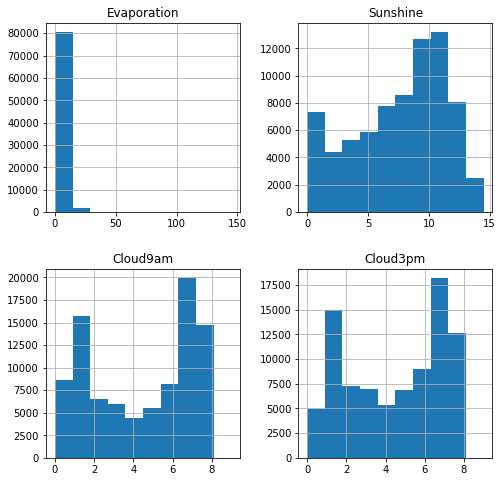

In [21]:
df[list_2].hist(figsize=(8, 8))
plt.show()

In [22]:
%%time
result_2 = {}
for x_column in list_2:
    result_2[x_column] = we.test_fillna_column(df, x_column)

result_2.keys()

CPU times: user 3.55 s, sys: 47.6 ms, total: 3.6 s
Wall time: 3.62 s


dict_keys(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

In [23]:
check_result_2 = result_2['Cloud9am']
check_result_2.head(2)

,Date,Location,Origin,G Ffill,G Median,G Mean,Median,Mean,G Mode,Mode
0,2008-12-01,Albury,8.0,8.0,8.0,8.000000,8.0,8.000000,8.0,8.0
1,2008-12-02,Albury,NaN,8.0,7.0,5.539683,5.0,4.447461,8.0,7.0



	G Ffill



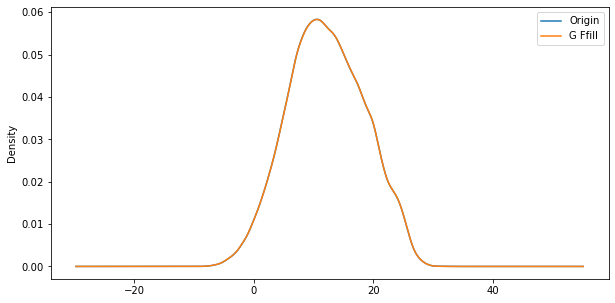


	G Median



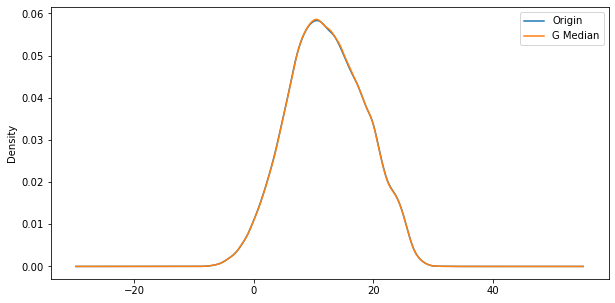


	G Mean



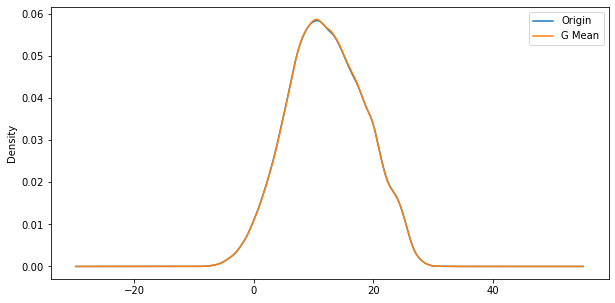


	Median



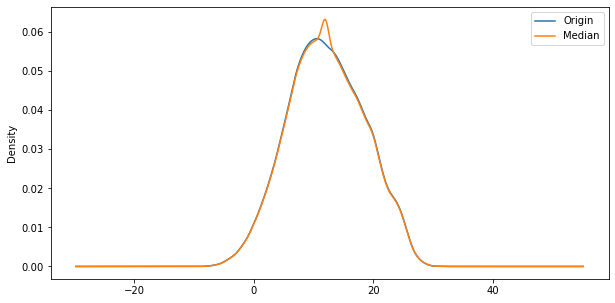


	Mean



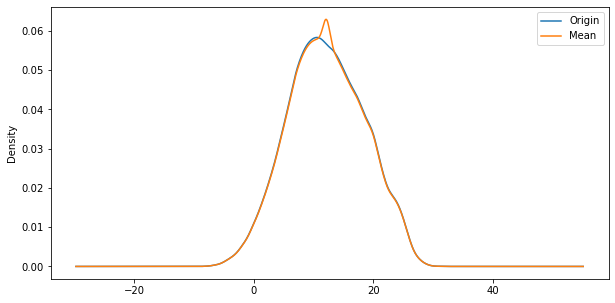


	G Mode



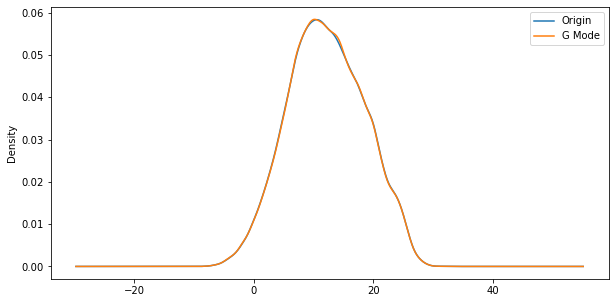


	Mode



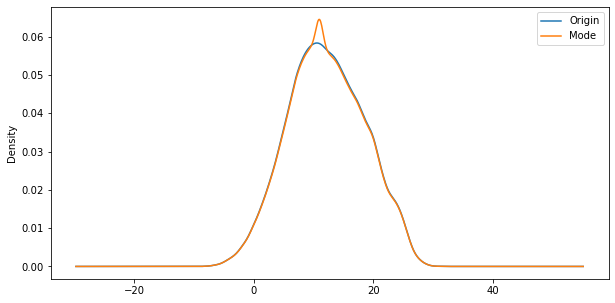

CPU times: user 2min 42s, sys: 376 ms, total: 2min 42s
Wall time: 2min 40s


In [24]:
%%time
list_columns = check_result_2.columns[2:].tolist()
col_orig = list_columns.pop(0)

for x_column in list_columns:
    print(f"\n\t{x_column}\n")
    check_result_1[[col_orig, x_column]].plot.kde(figsize=(10, 5))
    plt.show()

In [25]:
we.notna_column(df, 'Cloud9am', period='year', total=True).tail(20)

Date,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
Location,,,,,,,,,,,,
Hobart,0,184,363,333,0,0,0,245,364,365,176,2030
PearceRAAF,0,0,271,256,236,239,241,269,217,172,65,1966
Katherine,0,0,0,0,0,0,297,360,359,355,166,1537
Wollongong,0,14,145,162,152,126,114,146,194,185,107,1345
Albury,0,11,123,168,111,151,131,177,173,174,70,1289
Launceston,0,0,0,0,0,0,0,155,218,246,106,725
Richmond,0,0,0,0,0,0,0,123,200,169,113,605
Uluru,0,0,0,0,0,0,0,51,104,145,48,348
SalmonGums,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
check_indx = we.test_get_group_indx(df, 'Albany', 2017, 6)
check_result_2.loc[check_indx]

,Date,Location,Origin,G Ffill,G Median,G Mean,Median,Mean,G Mode,Mode
111586,2017-06-01,Albany,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
111587,2017-06-02,Albany,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0
111588,2017-06-03,Albany,7.0,7.0,7.0,7.000000,7.0,7.000000,7.0,7.0
111589,2017-06-04,Albany,7.0,7.0,7.0,7.000000,7.0,7.000000,7.0,7.0
111590,2017-06-05,Albany,6.0,6.0,6.0,6.000000,6.0,6.000000,6.0,6.0
111591,2017-06-06,Albany,6.0,6.0,6.0,6.000000,6.0,6.000000,6.0,6.0
111592,2017-06-07,Albany,NaN,6.0,6.0,4.740458,5.0,4.447461,7.0,7.0
111593,2017-06-08,Albany,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0
111594,2017-06-09,Albany,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,2.0
111595,2017-06-10,Albany,7.0,7.0,7.0,7.000000,7.0,7.000000,7.0,7.0


In [27]:
# Testing a column group N3
list_3 = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

we.isna_stats(df, list_3)

WindGustDir     7.1 %
WindDir9am     7.26 %
WindDir3pm     2.91 %
dtype: object

In [28]:
df[list_3].describe(include='object')

,WindGustDir,WindDir9am,WindDir3pm
count,135134,134894,141232
unique,16,16,16
top,W,N,SE
freq,9915,11758,10838


In [29]:
%%time
result_3 = {}
for x_column in list_3:
    result_3[x_column] = we.test_fillna_column(df, x_column)

result_3.keys()

CPU times: user 2.43 s, sys: 28.1 ms, total: 2.46 s
Wall time: 2.54 s


dict_keys(['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [30]:
check_result_3 = result_3['WindGustDir']
check_result_3.head(2)

,Date,Location,Origin,G Ffill,G Mode,Mode
0,2008-12-01,Albury,W,W,W,W
1,2008-12-02,Albury,WNW,WNW,WNW,WNW


In [31]:
we.isna_stats(check_result_3)[2:]

Origin      7.1 %
G Ffill    5.76 %
G Mode     4.18 %
Mode        0.0 %
dtype: object

In [32]:
list_columns = check_result_3.columns[2:].tolist()
col_orig = list_columns.pop(0)

diff_result = {}
for x_column in list_columns:
    diff_result[x_column] = check_result_3[x_column].value_counts() - \
                            check_result_3[col_orig].value_counts()

we.pd.DataFrame(diff_result)

,G Ffill,G Mode,Mode
E,132,379,0
ENE,127,527,0
ESE,110,65,0
N,93,126,0
NE,117,417,0
NNE,113,106,0
NNW,105,43,0
NW,139,361,0
S,125,81,0
SE,130,213,0


In [33]:
we.notna_column(df, 'WindGustDir', period='all')[::20]

,Date,1,2,3,4,5,6,7,8,9,10,11,12
Location,Date,,,,,,,,,,,,
Adelaide,2008,0,0,0,0,0,0,31,30,30,29,29,31
Albury,2008,0,0,0,0,0,0,0,0,0,0,0,30
BadgerysCreek,2009,31,28,31,30,31,29,31,31,30,31,30,30
Bendigo,2009,31,26,31,29,31,30,30,31,30,27,30,30
Cairns,2009,31,28,30,30,31,30,31,31,30,31,30,31
Cobar,2009,31,28,30,29,30,30,30,31,30,31,30,31
Dartmoor,2011,31,28,31,0,31,30,31,30,30,31,30,31
GoldCoast,2011,29,28,31,0,31,30,31,31,30,31,30,31
Katherine,2016,29,29,28,29,31,30,31,31,29,30,30,31


In [34]:
check_indx = we.test_get_group_indx(df, 'MountGinini', 2009, 4)
check_result_3.loc[check_indx]

,Date,Location,Origin,G Ffill,G Mode,Mode
52183,2009-04-01,MountGinini,NaN,NaN,W,W
52184,2009-04-02,MountGinini,NaN,NaN,W,W
52185,2009-04-03,MountGinini,NaN,NaN,W,W
52186,2009-04-04,MountGinini,NaN,NaN,W,W
52187,2009-04-05,MountGinini,NaN,NaN,W,W
52188,2009-04-06,MountGinini,NaN,NaN,W,W
52189,2009-04-07,MountGinini,NaN,NaN,W,W
52190,2009-04-08,MountGinini,NaN,NaN,W,W
52191,2009-04-09,MountGinini,NaN,NaN,W,W
52192,2009-04-10,MountGinini,NaN,NaN,W,W


In [35]:
# Testing a column group N4
list_4 = ['RainToday', 'RainTomorrow']

we.isna_stats(df, list_4)

RainToday       2.24 %
RainTomorrow    2.25 %
dtype: object

In [36]:
df[list_4].describe(include='object')

,RainToday,RainTomorrow
count,142199,142193
unique,2,2
top,No,No
freq,110319,110316


In [37]:
%%time
result_4 = {}
for x_column in list_4:
    result_4[x_column] = we.test_fillna_column(df, x_column)

result_4.keys()

CPU times: user 1.65 s, sys: 3.95 ms, total: 1.66 s
Wall time: 1.7 s


dict_keys(['RainToday', 'RainTomorrow'])

In [38]:
check_result_4 = result_4['RainToday']
check_result_4.head(2)

,Date,Location,Origin,G Ffill,G Mode,Mode
0,2008-12-01,Albury,No,No,No,No
1,2008-12-02,Albury,No,No,No,No


In [39]:
we.isna_stats(check_result_4)

Date         0.0 %
Location     0.0 %
Origin      2.24 %
G Ffill     0.89 %
G Mode       0.0 %
Mode         0.0 %
dtype: object

In [40]:
list_columns = check_result_4.columns[2:].tolist()
col_orig = list_columns.pop(0)

diff_result = {}
for x_column in list_columns:
    diff_result[x_column] = check_result_4[x_column].value_counts() - \
                            check_result_4[col_orig].value_counts()

we.pd.DataFrame(diff_result)

,G Ffill,G Mode,Mode
No,1361,3196,3261
Yes,599,65,0


In [41]:
list_columns = check_result_4.columns[2:].tolist()

rain_y = (check_result_4[list_columns] == 'Yes').sum()
rain_n = (check_result_4[list_columns] == 'No').sum()

rains = we.pd.DataFrame([rain_y, rain_n], index=['Yes', 'No'])
normed_rains = rains.div(rains.sum(axis=0), axis=1)
normed_rains

,Origin,G Ffill,G Mode,Mode
Yes,0.224193,0.2253,0.219614,0.219167
No,0.775807,0.7747,0.780386,0.780833


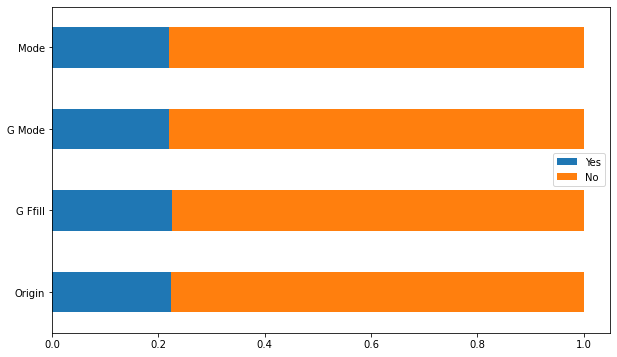

In [42]:
normed_rains.T.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.show()

In [43]:
we.notna_column(df, 'RainToday', period='all')[::20]

,Date,1,2,3,4,5,6,7,8,9,10,11,12
Location,Date,,,,,,,,,,,,
Adelaide,2008,0,0,0,0,0,0,25,25,28,28,29,31
Albury,2008,0,0,0,0,0,0,0,0,0,0,0,30
BadgerysCreek,2009,31,28,31,30,31,28,31,31,30,28,30,30
Bendigo,2009,31,28,31,30,31,30,31,31,30,31,30,31
Cairns,2009,31,28,31,30,31,30,31,31,30,31,30,31
Cobar,2009,31,28,31,30,31,30,31,31,29,31,30,31
Dartmoor,2011,31,28,31,0,31,30,31,31,30,31,30,31
GoldCoast,2011,31,28,31,0,31,30,31,31,30,31,30,31
Katherine,2016,31,29,31,30,31,30,30,31,30,31,30,27


In [44]:
check_indx = we.test_get_group_indx(df, 'Williamtown', 2013, 6)
check_result_4.loc[check_indx]

,Date,Location,Origin,G Ffill,G Mode,Mode
41061,2013-06-01,Williamtown,NaN,NaN,No,No
41062,2013-06-02,Williamtown,NaN,NaN,No,No
41063,2013-06-03,Williamtown,Yes,Yes,Yes,Yes
41064,2013-06-04,Williamtown,No,No,No,No
41065,2013-06-05,Williamtown,No,No,No,No
41066,2013-06-06,Williamtown,No,No,No,No
41067,2013-06-07,Williamtown,NaN,No,No,No
41068,2013-06-08,Williamtown,NaN,No,No,No
41069,2013-06-09,Williamtown,Yes,Yes,Yes,Yes
41070,2013-06-10,Williamtown,No,No,No,No
